## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [60]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [58]:
#df[['TV','radio']]
df.shape

(200, 4)


#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

<function matplotlib.pyplot.show>

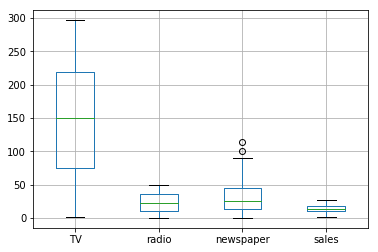

In [61]:
df.boxplot()
plt.show

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

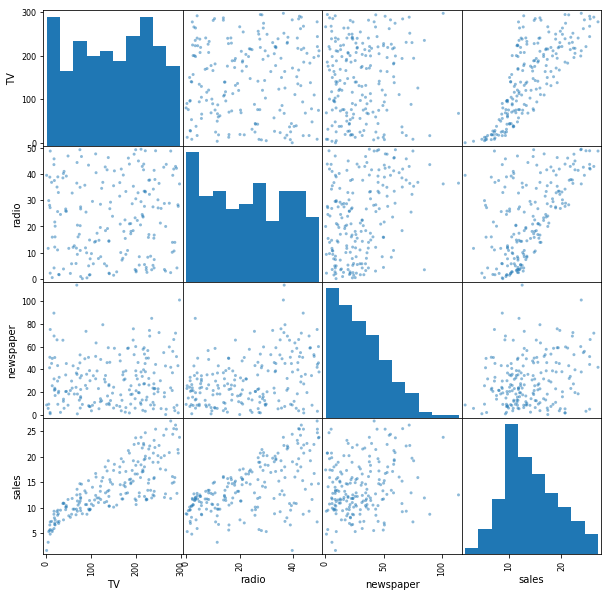

In [62]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(10,10))
plt.show()

In [ ]:
#Tv, radio, and newspaper are correlated with sales as data distributed with a linear pattern. TV, radio, and newspaper are not correlated with one another as 
#distributed randomly.

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [63]:
# Code here
y=df['sales']
y.head()
y.shape

(200,)

b) Set X to be just the features described above in df

In [64]:
x=df[['TV','radio','newspaper']]
#x.head()
x.shape
#x

(200, 3)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [65]:
# Code here
#size=200  NOT RANDOMLY
#x_train2=x[0:int(size*0.8)]
#x_test=x[int(size*0.8):]
#y_train = y[0:int(size*0.8)]
#y_test = y[int(size*0.8):]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

d) Train model on training data, and make predictions on testing data

In [66]:
regr = LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
#regr.predict(x_test)

Coefficients: 
 [ 0.04472952  0.18919505  0.00276111]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [67]:
# Code here
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 3.17
R^2: 0.90


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

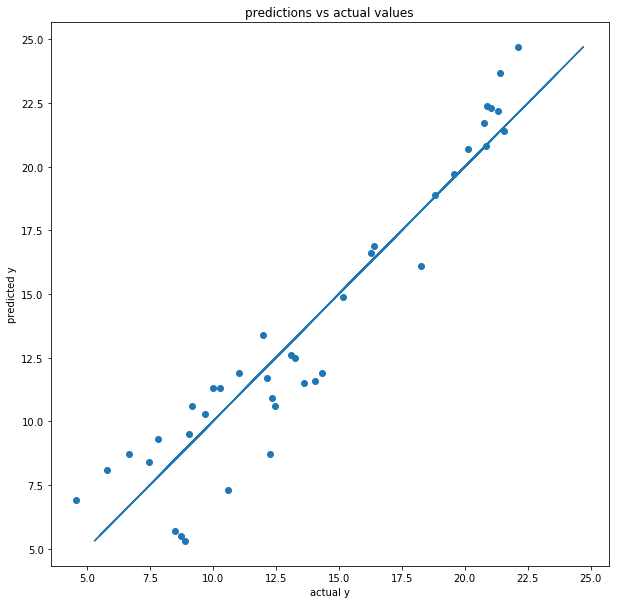

In [68]:
# Code here
plt.figure(figsize=(10,10))
plt.title('predictions vs actual values')
plt.scatter(regr.predict(x_test),y_test)
plt.ylabel("predicted y")
plt.xlabel("actual y")
plt.plot(y_test,y_test)
plt.show()
#plt.plot(y_test,y_test)

In [ ]:
#the points show some curvature, overall the model is okay.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [69]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.04472952  0.18919505  0.00276111]


In [ ]:
#the coefficient of newspaper is relatively samller than the other two. We should check the distribution and unit of 
#these three variables

In [24]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
#the correlation between TV,radio, and sales are strong, but newspaper does not have a strong correlation with sales.
#May be we can drop newspaper.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [ ]:
#One unit increase of investment on TV will increase the sales by 0.047 when control the rest two variables, 
#One unit increase of investment on radio will increase the sales by 0.179 when control the rest two , 
#One unit increase of investment on newspaper will increase the sales by 0.0026. 

In [70]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X2 = x.as_matrix().astype(np.float)
X2 = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, random_state=42)


# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 3.83060599  2.80191171  0.05998274]
Residual sum of squares: 3.17
Variance score: 0.90


In [ ]:
#After standardizing the predictor variables. we could see TV is most significant predictor. Before standardizing, 
#Radio has most influence on sales. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

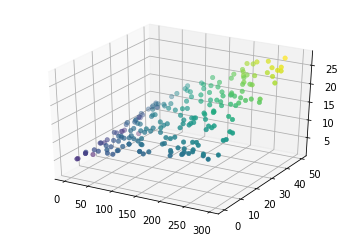

In [71]:
#Drop newspaper, it is not significant from previous analysis
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df['TV'],df['radio'],df['sales'],c=df['sales'], cmap='viridis', linewidth=0.5)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#lr = lm.LinearRegression().fit(x, y)
#ax.scatter(df['TV'], df['radio'], df['sales'], c='r', marker='o')

#xx1, xx2 = np.meshgrid(
#    np.linspace(df['TV'].min(), df['TV'].max(), num=10),
#    np.linspace(df['radio'].min(), df['radio'].max(), num=10))


#XX = np.column_stack([xx1.ravel(), xx2.ravel()])

#yy = lr.predict(XX)
#ax.plot_surface(xx1, xx2, yy.reshape(xx1.shape), color='None')
#ax.set_xlabel('TV')
#ax.set_ylabel('radio')
#ax.set_zlabel('sales')


In [ ]:
#the plot shows some curvature, so we could introduce an interaction between radio and Tv. 

Coefficients: 
 [ 0.01960636  0.03494256  0.0010502 ]
Residual sum of squares: 0.81
Variance score: 0.97


/Users/lj57/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


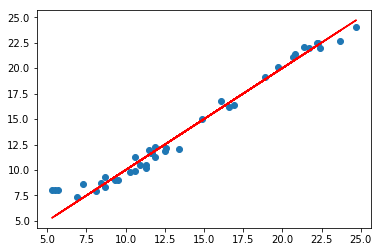

In [78]:
x=df[['TV','radio']]
x['TV*radio']=df['TV']*df['radio']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))
plt.scatter(y_test,regr.predict(x_test))
plt.plot(y_test,y_test,color='r')

In [ ]:
#as we can see, after adding the interaction variable, the new model become more fit. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


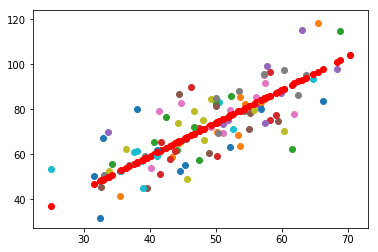

In [237]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


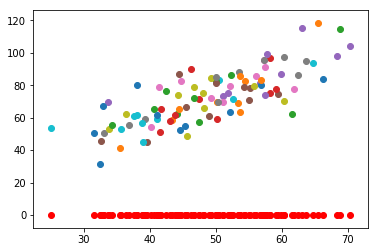

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


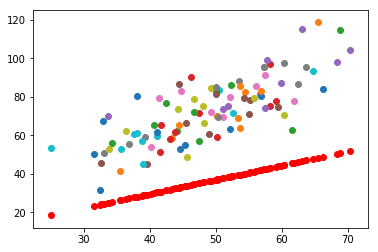

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


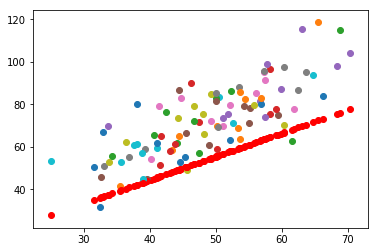

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


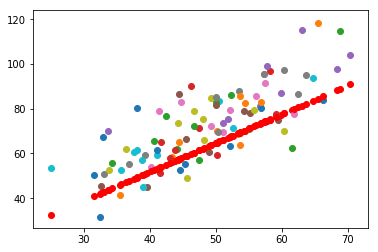

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


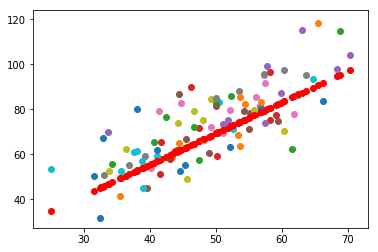

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


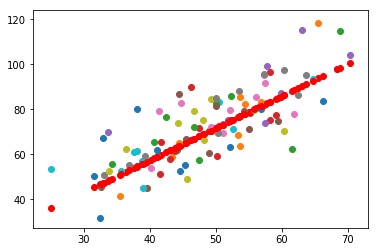

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


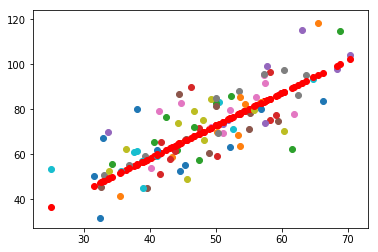

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


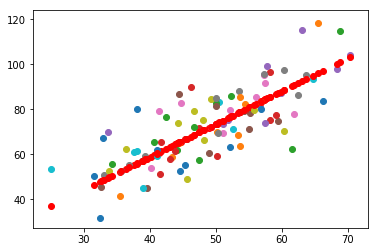

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


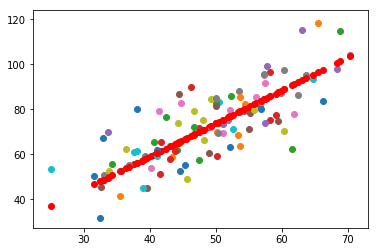

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


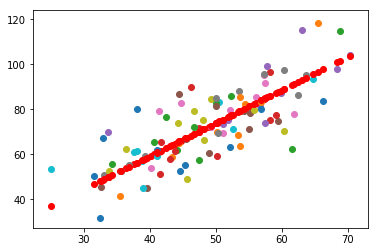

In [160]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()

In [ ]:
#When learning rate is small, need more time to convergent, when learning rate is very small such as 0.00001, it almost could not
#convergent 
#when learning rate is too large such as 0.01, it also not able to convergent.
#Only when the learning rate is selected appropriately that the two parameters could convergent. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

[86648.795004008396, 1373530.9288716826, 21797683.773910433, 345950151.47581983, 5490585677.5035219, 87141281978.78775, 1383022432889.3494, 21949998997164.68, 348369227101706.62, 5528980589368753.0, 87750650687353360.0, 1.3926937473537377e+18, 2.2103492780113723e+19, 3.5080533247805797e+20, 5.5676441058112092e+21]


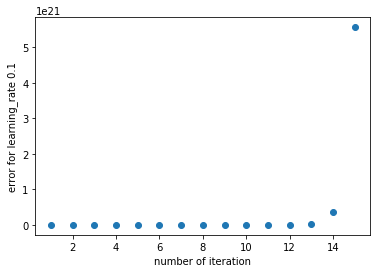

In [260]:
#iteration against error. plot
#number of iterations 
#various learning rates
#error 
# y is the error 
# x number of iterations
# use different points represent different learning rate

niteration=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
nlearning_rate=[0.001,0.0001,0.00001]
#d = {'learning_rate1': [0]*15, 'learning_rate2': [0]*15,'learning_rate3':[0]*15}
#learningrate=['learning_rate1','learning_rate2','learning_rate3']
#error = pd.DataFrame(data=d)
error = [0]*15

def run2(num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = nlearning_rate[0]
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    index=num_iterations-1
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error[index]=compute_error_for_line_given_points(b, m, points)


#for i in range(0,2):
for element in niteration:
    run2(element)
    
print(error)
plt.scatter(niteration,error)
plt.ylabel("error for learning_rate 0.1")
plt.xlabel("number of iteration")
plt.show()



[1484.586557408649, 457.85425757376731, 199.50998572553894, 134.50591058200533, 118.14969342239947, 114.03414906038149, 112.99857731713661, 112.7379818756847, 112.67238435909097, 112.65585181499746, 112.65166489759584, 112.65058436150113, 112.65028544701505, 112.6501832029397, 112.65013044507197]


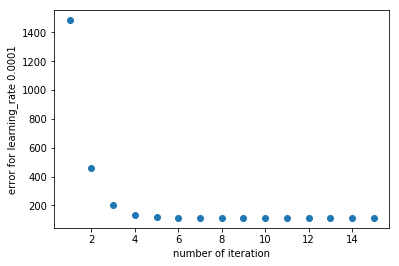

In [259]:
niteration=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
nlearning_rate=[0.001,0.0001,0.00001]
error = [0]*15
def run(num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = nlearning_rate[1]
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    index=num_iterations-1
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error[index]=compute_error_for_line_given_points(b, m, points)


#for i in range(0,2):
for element in niteration:
    run(element)
    
print(error)
plt.scatter(niteration,error)
plt.ylabel("error for learning_rate 0.0001")
plt.xlabel("number of iteration")
plt.show()

[5035.1668068354884, 4556.7323715944003, 4124.7984451751363, 3734.8455006002387, 3382.7932775716404, 3064.9580887957231, 2778.0142758375259, 2518.9594111985889, 2285.082882511535, 2073.9375301330579, 1883.3140413661808, 1711.217833386537, 1555.8481829879047, 1415.5793847717216, 1288.9437406299394]


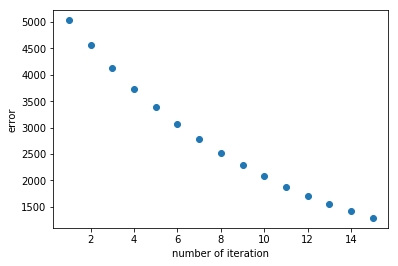

In [258]:
niteration=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
nlearning_rate=[0.001,0.0001,0.00001]
error = [0]*15
def run(num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = nlearning_rate[2]
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    index=num_iterations-1
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error[index]=compute_error_for_line_given_points(b, m, points)


#for i in range(0,2):
for element in niteration:
    run(element)
    
print(error)
plt.scatter(niteration,error)
plt.ylabel("error")
plt.xlabel("number of iteration")
plt.show()